In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
# Memuat dan Menyimpan Data ke CSV

# Fungsi untuk mengekstrak fitur HOG dari gambar
def extract_hog_features(image_path, resize_dim=(244, 244)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, resize_dim)
    hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=True)
    return hog_features

# Fungsi untuk memuat dan mengekstrak fitur HOG dari dataset
def load_and_extract_features(data_dir, classes, resize_dim=(244, 244)):
    X = []
    y = []
    
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            features = extract_hog_features(img_path, resize_dim)
            X.append(features)
            y.append(class_name)
    
    return np.array(X), np.array(y)

# Path ke direktori dataset
dataset_dir = "D:/kuliah/Tugas Akhir/Code/Klasifikasi Tingkat Kematangan Buah Pisang/Dataset/Default"
classes = ['Mentah', 'Menuju Matang', 'Matang', 'Terlalu matang', 'Busuk']

# Memuat dan mengekstrak fitur HOG dari dataset
X, y = load_and_extract_features(dataset_dir, classes)

# Menyusun fitur dan label ke dalam DataFrame pandas
df = pd.DataFrame(X)
df['label'] = y

# Simpan DataFrame ke dalam file CSV
csv_file = "./Dataset/Dataset_Pisang_Kepok.csv"
df.to_csv(csv_file, index=False)

print(f'Dataset telah disimpan ke dalam file: {csv_file}')

<ipython-input-3-325cfd8d2704>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=True)


Dataset telah disimpan ke dalam file: ./Dataset/Dataset_Pisang_Kepok.csv


In [22]:
# Memuat Data dari CSV dan Menyiapkan Data untuk KNN

# Fungsi untuk memuat dan memproses data dari CSV
def load_and_prepare_data(csv_path):
    df = pd.read_csv(csv_path)
    X = df.iloc[:, :-1].values
    y = df['label'].values
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Path ke file CSV
csv_file = "./Dataset/Dataset_Pisang_Kepok.csv"

# Memuat dan memproses data dari file CSV
X_train, X_test, y_train, y_test = load_and_prepare_data(csv_file)

In [23]:
# Melatih Model KNN

# Fungsi untuk melatih model KNN
def train_knn(X_train, y_train, n_neighbors=6):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

# Melatih model KNN
knn = train_knn(X_train, y_train, n_neighbors=6)

In [24]:
# Menyimpan Model KNN

# Fungsi untuk menyimpan model KNN
def save_model(model, model_path):
    joblib.dump(model, model_path)
    print(f'Model telah disimpan ke: {model_path}')

# Path ke file model yang akan disimpan
model_path = "./Models/KNN_best_model.pkl"

# Menyimpan model KNN
save_model(knn, model_path)

Model telah disimpan ke: ./Models/KNN_best_model.pkl


In [25]:
# Memuat Model KNN yang Telah Disimpan

# Fungsi untuk memuat model KNN yang telah disimpan
def load_model(model_path):
    return joblib.load(model_path)

# Memuat model KNN yang telah disimpan
knn_loaded = load_model(model_path)

                precision    recall  f1-score   support

        Mentah       1.00      1.00      1.00        37
 Menuju Matang       0.86      0.86      0.86        28
        Matang       0.97      1.00      0.98        32
Terlalu matang       0.90      0.90      0.90        29
         Busuk       1.00      0.97      0.99        34

      accuracy                           0.95       160
     macro avg       0.94      0.94      0.94       160
  weighted avg       0.95      0.95      0.95       160



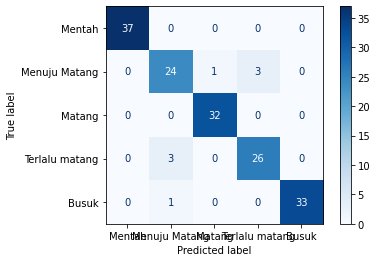

In [26]:
# Evaluasi Model KNN

# Fungsi untuk mengevaluasi model KNN
def evaluate_model(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=classes))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Evaluasi model KNN
evaluate_model(knn_loaded, X_test, y_test, classes)